### Q1. Data Preprocessing & EDA

In [6]:
import numpy as np
import pandas as pd
df =pd.read_csv('C:/Users/Praty/OneDrive/Desktop/VSC/DAV/IITB_UG_Student_Dataset.csv')

#removing rows with null ages and null genders

df = df.dropna(subset=['Age'])
df = df.dropna(subset=['Gender'])

#replacing null data in rest columns by mean and mode

df.fillna({"StudyHoursPerDay":df["StudyHoursPerDay"].mean()},inplace=True)          #mean
df.fillna({"SocialMediaHours":df["SocialMediaHours"].mean()},inplace=True)          #mean
df.fillna({"MovieTvShowHours":df["MovieTvShowHours"].mean()},inplace=True)          #mean
df.fillna({"PoR":df["PoR"].mode()[0]},inplace=True)                                 #mode
df.fillna({"AttendancePercentage":df["AttendancePercentage"].mean()},inplace=True)  #mean
df.fillna({"SleepHoursPerNight":df["SleepHoursPerNight"].mean()},inplace=True)      #mean
df.fillna({"Diet_Quality":df["Diet_Quality"].mode()[0]},inplace=True)               #mode
df.fillna({"Exercise_frequency":df["Exercise_frequency"].mode()[0]},inplace=True)   #mode
df.fillna({"parental_education_level":df["parental_education_level"].mode()[0]},inplace=True)    #mode
df.fillna({"internet_quality":df["internet_quality"].mode()[0]},inplace=True)                    #mode
df.fillna({"mental_health_rating":df["mental_health_rating"].mode()[0]},inplace=True)            #mode
df.fillna({"extracurricular_participation":df["extracurricular_participation"].mode()[0]},inplace=True)   #mode
df.fillna({"Cumulative_Grade":df["Cumulative_Grade"].mean()},inplace=True)          #mean


In [7]:
#recording mean,median,mode,std dev

col_list_1=('StudyHoursPerDay','SocialMediaHours','MovieTvShowHours','AttendancePercentage','SleepHoursPerNight','Cumulative_Grade')
col_list_2=('PoR','Diet_Quality','Exercise_frequency','parental_education_level','internet_quality','mental_health_rating','extracurricular_participation')
for col in col_list_1 :
   mean = df[col].mean()
   median = df[col].median()
   std = df[col].std()
   stats_text = f"Mean: {mean:.2f}\nMedian: {median:.2f}\nStd Dev: {std:.2f}"
   print("Stats for",col)
   print(stats_text)
   print()
for col in col_list_2 :
   mode = df[col].mode()[0]
   stats_text = f"Mode: {mode}"
   print("Stats for",col)
   print(stats_text)
   print()


Stats for StudyHoursPerDay
Mean: 3.56
Median: 3.56
Std Dev: 1.45

Stats for SocialMediaHours
Mean: 2.51
Median: 2.50
Std Dev: 1.17

Stats for MovieTvShowHours
Mean: 1.82
Median: 1.82
Std Dev: 1.08

Stats for AttendancePercentage
Mean: 84.04
Median: 84.04
Std Dev: 9.36

Stats for SleepHoursPerNight
Mean: 6.46
Median: 6.46
Std Dev: 1.21

Stats for Cumulative_Grade
Mean: 69.79
Median: 70.60
Std Dev: 16.78

Stats for PoR
Mode: No

Stats for Diet_Quality
Mode: Fair

Stats for Exercise_frequency
Mode: 3.0

Stats for parental_education_level
Mode: High School

Stats for internet_quality
Mode: Good

Stats for mental_health_rating
Mode: 6.0

Stats for extracurricular_participation
Mode: No



### Questions:

1.How does study hours generally affected by age?

2.Does females have more study hours than males ?

3.How does sleep schedule affects attendance percentage ?

4.Which age group does the most exercise ?

5.How does PoR affect Grades ?

6.How does PoR affect attendance ?

7.Does good grades mean good mental health ?

8.How does Diet affect study hours ?


Text(0.5, 1.0, 'StudyHoursPerDay v Diet_Quality')

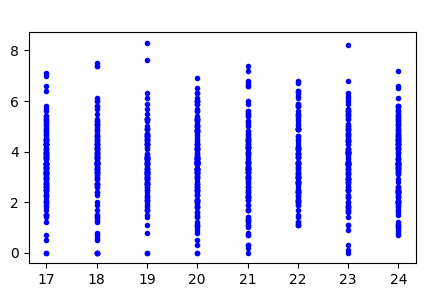

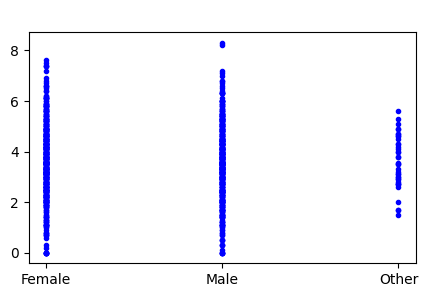

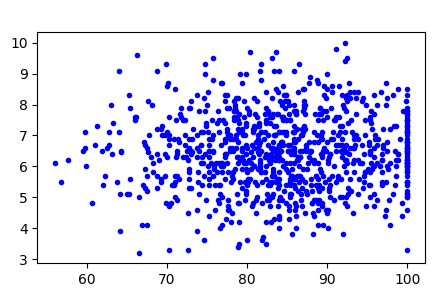

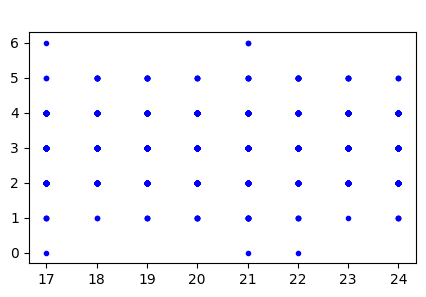

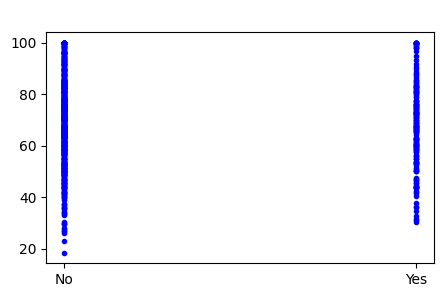

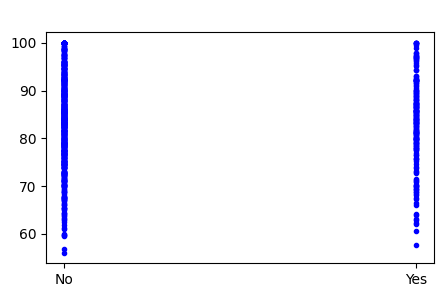

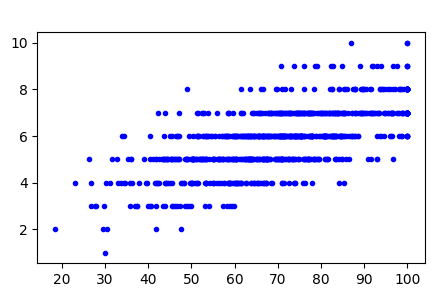

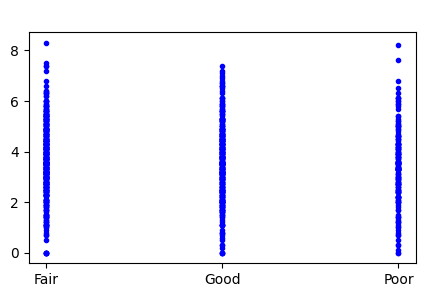

In [8]:
#1
import matplotlib.pyplot as plt
plt.figure(figsize=(5,3))
plt.plot(df["Age"],df['StudyHoursPerDay'],'b.')
plt.title(f'StudyHoursPerDay v Age',color='white')
#Study hours doesnt seem to change much with age

#2
plt.figure(figsize=(5,3))
plt.plot(df["Gender"],df['StudyHoursPerDay'],'b.')
plt.title(f'StudyHoursPerDay v Gender',color='white')
#Quite a little bit but yes

#3
plt.figure(figsize=(5,3))
plt.plot(df["AttendancePercentage"],df['SleepHoursPerNight'],'b.')
plt.title(f'SleepHoursPerNight v AttendancePercentage',color='white')
#People with 6-8 hrs of sleep seem to have good attendance

#4
plt.figure(figsize=(5,3))
plt.plot(df["Age"],df['Exercise_frequency'],'b.')
plt.title(f'Exercise_frequency v Age',color='white')
#Again, quite similar trend across all ages

#5
plt.figure(figsize=(5,3))
plt.plot(df["PoR"],df['Cumulative_Grade'],'b.')
plt.title(f'Cumulative_Grade v PoR',color='white')
#Seems people with PoR have better grades

#6
plt.figure(figsize=(5,3))
plt.plot(df["PoR"],df['AttendancePercentage'],'b.')
plt.title(f'AttendancePercentage v PoR',color='white')
#People not having PoR have better attendance

#7
plt.figure(figsize=(5,3))
plt.plot(df["Cumulative_Grade"],df['mental_health_rating'],'b.')
plt.title(f'mental_health_rating v Cumulative_Grade',color='white')
#Grades are the major determinating factor of mental health it seems.

#8
plt.figure(figsize=(5,3))
plt.plot(df["Diet_Quality"],df['StudyHoursPerDay'],'b.')
plt.title(f'StudyHoursPerDay v Diet_Quality',color='white')
#Good to fair diet has better study hours


### Q2. Regression Modeling & Diagnostics

a. Model Training and Evaluation

$
 Linear  Regression
$

In [9]:
#Linear regression model

from sklearn.model_selection import train_test_split
x=df[['StudyHoursPerDay','SocialMediaHours','MovieTvShowHours','AttendancePercentage','SleepHoursPerNight','Exercise_frequency','mental_health_rating']]
y=df[['Cumulative_Grade']]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=101)
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

C:\Users\praty\AppData\Local\Temp\ipykernel_21544\1326804959.py:7: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b." (-> color='b'). The keyword argument will take precedence.
  plt.plot(y_test, (lr.predict(x_test)-y_test)*100/y_test,'b.',color='red')
c:\Users\praty\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\_core\fromnumeric.py:84: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


MAE= 4.693551351676514
RMSE= 5.821656797760842
R2= Cumulative_Grade    0.886606
dtype: float64


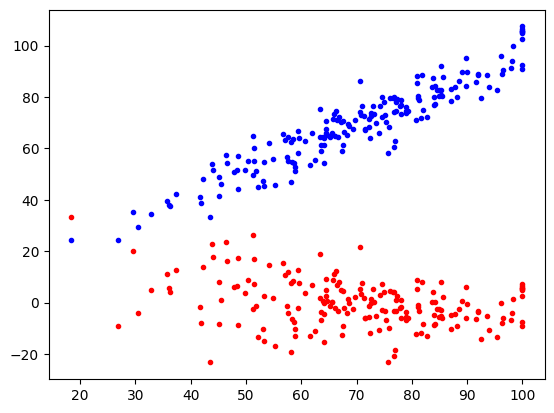

In [10]:
import matplotlib.pyplot as plt

#plot of predicted vs real Cumulative grade
plt.plot(y_test, lr.predict(x_test),'b.')

#plot of error percentage in predicted vs real Cumulative grade
plt.plot(y_test, (lr.predict(x_test)-y_test)*100/y_test,'b.',color='red')


RSS=np.sum((y_test-lr.predict(x_test))**2)
TSS=np.sum((y_test-np.mean(y_test))**2)
R2=1-(RSS/TSS)
MAE=np.mean(np.abs(y_test-lr.predict(x_test)))
MSE=np.mean((y_test-lr.predict(x_test))**2)
RMSE=np.sqrt(MSE)

print('MAE=',MAE )
print('RMSE=',RMSE)
print('R2=',R2)

$
Random \ Forest \ Regressor
$


In [11]:
#Random Forest Regressor model

from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor()
rfr.fit(x_train,y_train)

c:\Users\praty\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor()

MAE= 6.232372972972973
RMSE= 7.798477919752346
R2= Cumulative_Grade    0.796522
dtype: float64


C:\Users\praty\AppData\Local\Temp\ipykernel_21544\2385938621.py:8: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b." (-> color='b'). The keyword argument will take precedence.
  plt.plot(y_test, ((reshaped_rfr_predict_x_test-y_test)*100/y_test),'b.',color='red')
c:\Users\praty\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\_core\fromnumeric.py:84: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


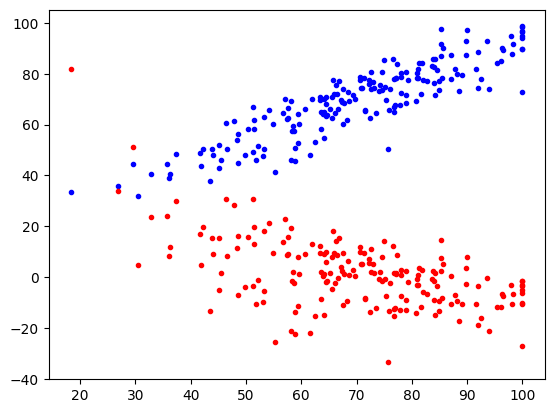

In [12]:
import matplotlib.pyplot as plt
reshaped_rfr_predict_x_test=rfr.predict(x_test).reshape(-1,1)

#plot of predicted vs real Cumulative grade
plt.plot(y_test,reshaped_rfr_predict_x_test ,'b.')

#plot of error percentage in predicted vs real Cumulative grade
plt.plot(y_test, ((reshaped_rfr_predict_x_test-y_test)*100/y_test),'b.',color='red')

RSS=np.sum((y_test-(reshaped_rfr_predict_x_test))**2)
TSS=np.sum((y_test-np.mean(y_test))**2)
R2=1-(RSS/TSS)
MAE=np.mean(np.abs(y_test-(reshaped_rfr_predict_x_test)))
MSE=np.mean((y_test-(reshaped_rfr_predict_x_test))**2)
RMSE=np.sqrt(MSE)

print('MAE=',MAE )
print('RMSE=',RMSE)
print('R2=',R2)

The Linear Regression model performs better due to lesser RMSE and MAE values and higher R2 value than the Random Forest Regressor model.

It can be seen from the plot as well, the error in the data is higher for the Random Forest model.